In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GRU, TimeDistributed, Reshape
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
x_train = []
y_train = []

image_size = 224

for label in labels:
    trainingpath = os.path.join('/content/drive/MyDrive/brain_tumor/dataset/Training', label)
    for file in tqdm(os.listdir(trainingpath)):
        image = cv2.imread(os.path.join(trainingpath, file), cv2.IMREAD_COLOR)

        image = cv2.resize(image, (image_size, image_size))
        x_train.append(image)
        y_train.append(labels.index(label))

x_train = np.array(x_train) / 255.0

print("Training data shape:", x_train.shape)


  0%|          | 0/1321 [00:00<?, ?it/s]

100%|██████████| 1457/1457 [00:27<00:00, 52.55it/s]


Training data shape: (5712, 224, 224, 3)


In [ ]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
x_test = []
y_test = []

image_size = 224

for label in labels:

    testingpath = os.path.join('/content/drive/MyDrive/brain_tumor/dataset/Testing', label)
    for file in tqdm(os.listdir(testingpath)):
        image = cv2.imread(os.path.join(testingpath, file), cv2.IMREAD_COLOR)

        image = cv2.resize(image, (image_size, image_size))
        x_test.append(image)
        y_test.append(labels.index(label))
x_test = np.array(x_test) / 255.0

print("Training data shape:", x_test.shape)


100%|██████████| 300/300 [00:06<00:00, 49.63it/s]


Training data shape: (1311, 224, 224, 3)


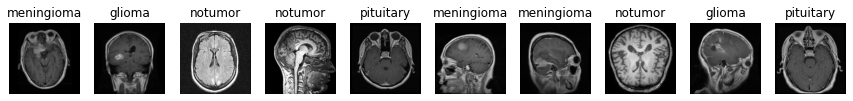

In [ ]:
def visualize_dataset(images, labels, label_names, num_samples=10):
    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        idx = np.random.randint(0, len(images))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx])
        plt.title(label_names[labels[idx]])
        plt.axis('off')
    plt.show()

visualize_dataset(x_train, y_train, labels, num_samples=10)

In [ ]:
x_train, y_train = shuffle(x_train, y_train, random_state=42)
# Convert labels to categorical data
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(labels))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(labels))



x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Test data shape:", x_test.shape)


Training data shape: (4569, 224, 224, 3)
Validation data shape: (1143, 224, 224, 3)
Test data shape: (1311, 224, 224, 3)


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    featurewise_std_normalization=True)
datagen.fit(x_train)

c:\Users\ADMIN\anaconda3\envs\ml_env\lib\site-packages\keras_preprocessing\image\image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


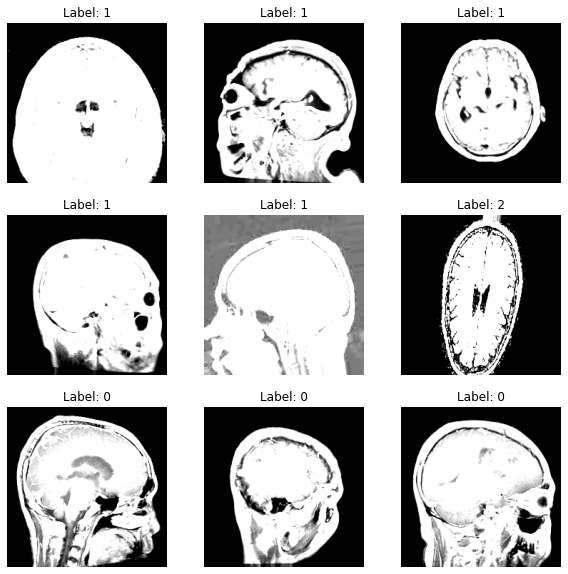

In [ ]:
# Generate a batch of augmented images
xtrain_augmented = datagen.flow(x_train, y_train, batch_size=9, shuffle=True)
X_batch, y_batch = next(xtrain_augmented)

# Visualize augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_batch[i])
    plt.axis('off')
    plt.title(f"Label: {np.argmax(y_batch[i])}")
plt.show()

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

train_data = train_datagen.flow(x_train, y_train, batch_size=32)
val_data = val_datagen.flow(x_val, y_val, batch_size=32)

Epoch 1/50
143/143 [==============================] - 617s 4s/step - loss: 0.6180 - accuracy: 0.7805 - val_loss: 29.2835 - val_accuracy: 0.2616
Epoch 2/50
143/143 [==============================] - 494s 3s/step - loss: 0.3295 - accuracy: 0.8871 - val_loss: 4.0369 - val_accuracy: 0.3255
Epoch 3/50
143/143 [==============================] - 500s 3s/step - loss: 0.2543 - accuracy: 0.9131 - val_loss: 1.8643 - val_accuracy: 0.6387
Epoch 4/50
143/143 [==============================] - 494s 3s/step - loss: 0.1871 - accuracy: 0.9370 - val_loss: 2.3688 - val_accuracy: 0.6019
Epoch 5/50
143/143 [==============================] - 494s 3s/step - loss: 0.1391 - accuracy: 0.9514 - val_loss: 2.5078 - val_accuracy: 0.5564
Epoch 6/50
143/143 [==============================] - 494s 3s/step - loss: 0.1096 - accuracy: 0.9615 - val_loss: 0.2730 - val_accuracy: 0.9195
Epoch 7/50
143/143 [==============================] - 486s 3s/step - loss: 0.0814 - accuracy: 0.9720 - val_loss: 0.2700 - val_accuracy: 0.916

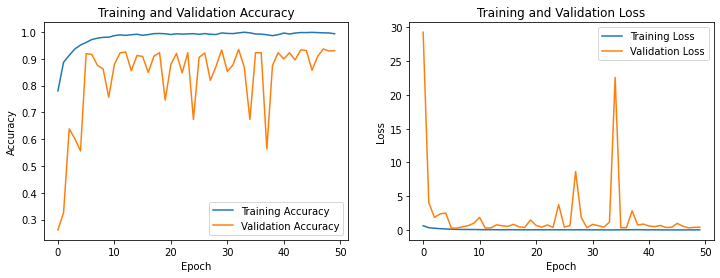

In [ ]:

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Define input shape and number of classes
input_shape = (image_size, image_size, 3)
num_classes = len(labels)

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/brain_tumor/dataset/best_cnn_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=[model_checkpoint]
)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


Epoch 1/50
143/143 [==============================] - 850s 6s/step - loss: 1.2121 - accuracy: 0.5349 - val_loss: 1.8120 - val_accuracy: 0.2616
Epoch 2/50
143/143 [==============================] - 476s 3s/step - loss: 1.0263 - accuracy: 0.5907 - val_loss: 2.5552 - val_accuracy: 0.2668
Epoch 3/50
143/143 [==============================] - 487s 3s/step - loss: 0.8839 - accuracy: 0.6439 - val_loss: 1.9799 - val_accuracy: 0.4077
Epoch 4/50
143/143 [==============================] - 565s 4s/step - loss: 0.8488 - accuracy: 0.6654 - val_loss: 1.0724 - val_accuracy: 0.6439
Epoch 5/50
143/143 [==============================] - 505s 4s/step - loss: 0.7971 - accuracy: 0.6789 - val_loss: 1.0003 - val_accuracy: 0.6395
Epoch 6/50
143/143 [==============================] - 525s 4s/step - loss: 0.7352 - accuracy: 0.7209 - val_loss: 0.6750 - val_accuracy: 0.7235
Epoch 7/50
143/143 [==============================] - 517s 4s/step - loss: 0.7517 - accuracy: 0.7056 - val_loss: 0.8699 - val_accuracy: 0.6360

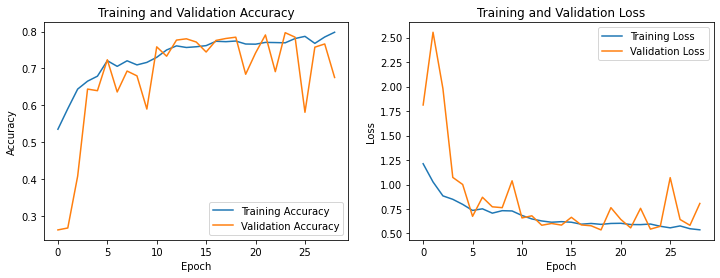

In [ ]:


# Define the CNN-GRU model
def create_cnn_gru_model(input_shape, num_classes):
    model = Sequential()

    # CNN layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Reshape((1, -1)))

    model.add(GRU(128, return_sequences=False))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    return model

# Define input shape and number of classes
input_shape = (image_size, image_size, 3)
num_classes = len(labels)

# Create the model
model = create_cnn_gru_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/brain_tumor/dataset/best_cnn_gru_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

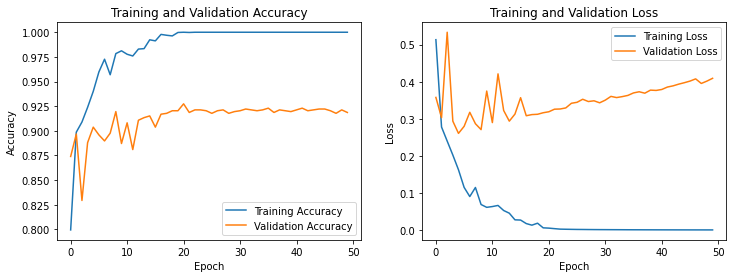

In [ ]:


num_classes = len(labels)

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()
model_checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/brain_tumor/dataset/best_inception_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model with callback for model checkpointing
history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=[model_checkpoint]
)


# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

1/1 [==============================] - 0s 380ms/step


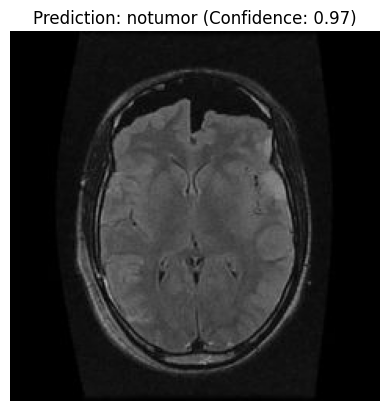

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf

# Define the labels for your classes
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the input image size
image_size = 224

# Load an example image for prediction
example_image_path = '/content/drive/MyDrive/brain_tumor/dataset/Testing/notumor/Te-no_0018.jpg'
example_image = cv2.imread(example_image_path, cv2.IMREAD_COLOR)
example_image = cv2.resize(example_image, (image_size, image_size))
example_image = np.expand_dims(example_image, axis=0) / 255.0  # Normalize and add batch dimension

# Load the trained model
model_path = '/content/drive/MyDrive/brain_tumor/best_cnn_model.h5'
model = tf.keras.models.load_model(model_path)

# Perform prediction
predictions = model.predict(example_image)
predicted_class_index = np.argmax(predictions[0])
predicted_class = labels[predicted_class_index]
confidence = predictions[0][predicted_class_index]

# Display the prediction
plt.imshow(cv2.cvtColor(cv2.imread(example_image_path), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Prediction: {predicted_class} (Confidence: {confidence:.2f})')
plt.show()


CNN Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

      glioma       0.98      0.81      0.89       300
  meningioma       0.83      0.82      0.82       306
     notumor       0.92      0.99      0.95       405
   pituitary       0.92      0.99      0.95       300

    accuracy                           0.91      1311
   macro avg       0.91      0.90      0.91      1311
weighted avg       0.91      0.91      0.91      1311



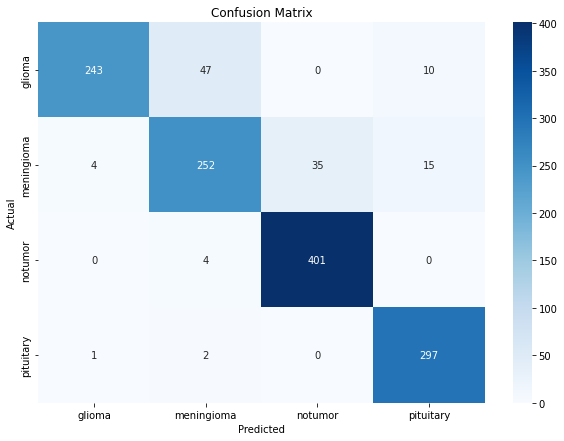

In [ ]:
# Define the labels for your classes
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the input image size
image_size = 224

# Load test data
x_test = []
y_test = []

for label in labels:
    testingpath = os.path.join('dataset/Testing', label)
    for file in os.listdir(testingpath):
        image = cv2.imread(os.path.join(testingpath, file), cv2.IMREAD_COLOR)
        image = cv2.resize(image, (image_size, image_size))
        x_test.append(image)
        y_test.append(labels.index(label))
x_test = np.array(x_test) / 255.0
y_test = np.array(y_test)

# Convert labels to categorical data
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=len(labels))

# Load models
cnn_model_path = '/content/drive/MyDrive/brain_tumor/best_cnn_model.h5'
cnn_gru_model_path = '/content/drive/MyDrive/brain_tumor/best_cnn_gru_model.h5'
inception_model_path = '/content/drive/MyDrive/brain_tumor/best_inception_model.h5'

cnn_model = tf.keras.models.load_model(cnn_model_path)
cnn_gru_model = tf.keras.models.load_model(cnn_gru_model_path)
inception_model = tf.keras.models.load_model(inception_model_path)

# Function to evaluate model
def evaluate_model(model, x_test, y_test, y_test_categorical, labels):
    predictions = model.predict(x_test)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y_test_categorical, axis=1)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=labels))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate CNN model
print("CNN Model Evaluation:")
evaluate_model(cnn_model, x_test, y_test, y_test_categorical, labels)



CNN-GRU Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

      glioma       0.70      0.81      0.75       300
  meningioma       0.63      0.35      0.45       306
     notumor       0.80      0.89      0.84       405
   pituitary       0.81      0.92      0.86       300

    accuracy                           0.75      1311
   macro avg       0.73      0.74      0.72      1311
weighted avg       0.74      0.75      0.73      1311



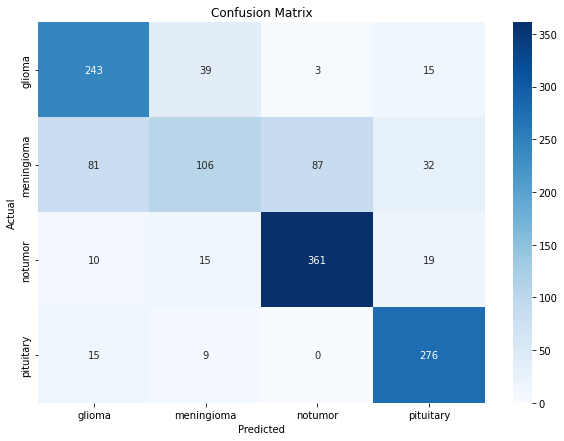

In [ ]:

print("CNN-GRU Model Evaluation:")
evaluate_model(cnn_gru_model, x_test, y_test, y_test_categorical, labels)



InceptionV3 Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

      glioma       0.91      0.88      0.89       300
  meningioma       0.85      0.88      0.86       306
     notumor       0.98      0.99      0.98       405
   pituitary       0.95      0.95      0.95       300

    accuracy                           0.93      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.93      0.93      0.93      1311



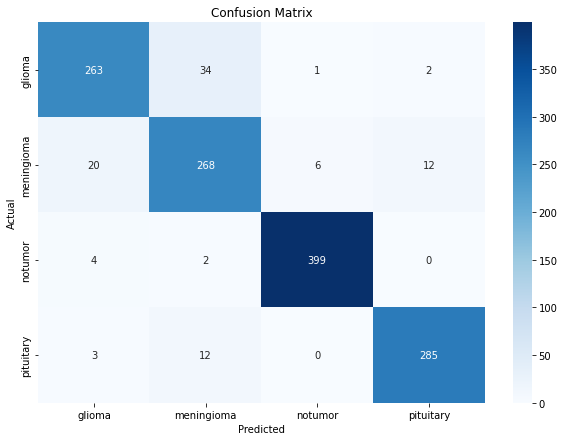

In [ ]:

print("InceptionV3 Model Evaluation:")
evaluate_model(inception_model, x_test, y_test, y_test_categorical, labels)

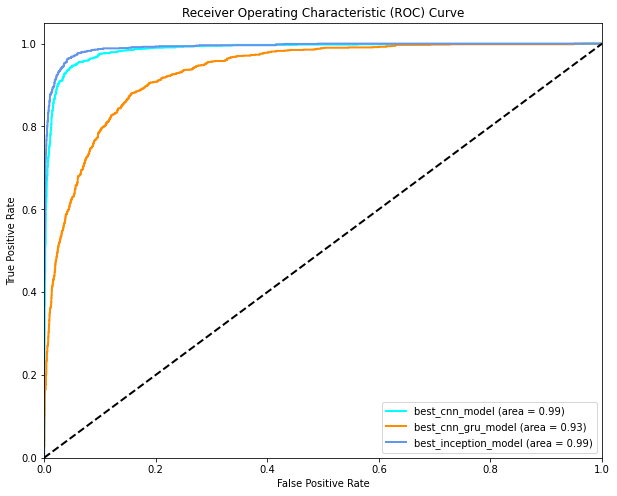

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import tensorflow as tf

def load_model(path):
    return tf.keras.models.load_model(path)

def plot_roc_curves(model_paths, model_names, X_test, y_test, n_classes):
    plt.figure(figsize=(10, 8))

    # Binarize the output
    y_test_binarized = label_binarize(y_test, classes=[i for i in range(n_classes)])

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

    for path, name, color in zip(model_paths, model_names, colors):
        model = load_model(path)
        y_score = model.predict(X_test)

        # Ensure the y_score shape matches y_test_binarized
        if y_score.shape[0] != y_test_binarized.shape[0]:
            raise ValueError(f"Model {name} predicted {y_score.shape[0]} samples but got {y_test_binarized.shape[0]} samples.")

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        plt.plot(fpr["micro"], tpr["micro"], color=color, lw=2,
                 label=f'{name} (area = {roc_auc["micro"]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()



# Example usage
# Paths to your saved models
model_paths = [
    '/content/drive/MyDrive/brain_tumor/best_cnn_model.h5',
    '/content/drive/MyDrive/brain_tumor/best_cnn_gru_model.h5',
    '/content/drive/MyDrive/brain_tumor/best_inception_model.h5'
]

model_names = ['best_cnn_model', 'best_cnn_gru_model', 'best_inception_model']


# Plot ROC curves
plot_roc_curves(model_paths, model_names, x_test, y_test, n_classes=4)


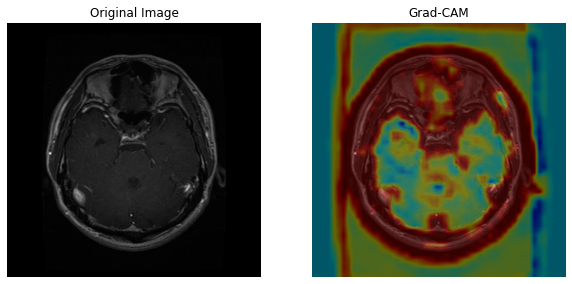

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
image_size = 224

def get_gradcam_heatmap(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, model, last_conv_layer_name, pred_index=None):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_array = np.expand_dims(cv2.resize(img, (image_size, image_size)), axis=0) / 255.0

    heatmap = get_gradcam_heatmap(model, img_array, last_conv_layer_name, pred_index)

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM')
    plt.axis('off')

    plt.show()

image_path = '/content/drive/MyDrive/brain_tumor/dataset/Testing/pituitary/Te-piTr_0001.jpg'
cnn_model_path = '/content/drive/MyDrive/brain_tumor/best_cnn_model.h5'
cnn_model = tf.keras.models.load_model(cnn_model_path)

display_gradcam(image_path, cnn_model, 'conv2d_2')
